In [1]:
!pip install gym

In [2]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import random

In [3]:
class GridEnvironement(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(36) #3 by 3 grid , this will be changed to 36
        self.action_space = spaces.Discrete(4) # 4 actions = up, down, right, left
        self.max_timesteps = 10 # change this later as we see fit .
        
    def earn_reward(self, reward):
        if (self.agent_pos == self.goal_pos).all():
            reward+=15 # reaching the goal is +10 rewards. 
        if (self.agent_pos == [0,2]).all(): # which position has more reward than the other.
            reward +=3
        if (self.agent_pos == [1, 3]).all():
            reward-=3
        if (self.agent_pos == [2, 0]).all():
            reward+=3
        if (self.agent_pos == [5, 0]).all():
            reward+=7
        if (self.agent_pos == [2 ,2]).all():
            reward-=5
        if (self.agent_pos == [2, 5]).all():
            reward+=7
        if (self.agent_pos == [4, 1]).all():
            reward-=7
        if (self.agent_pos == [4, 4]).all():
            reward-=9
        if (self.agent_pos == [5, 2]).all():
            reward+= 10
        
        return reward
    
    def reset(self):
        self.timestep = 0 # initial value for timestep
        self.agent_pos = [0, 0]
        self.goal_pos = [5, 5] # this will be changed to [5, 5] when grid is 6 by 6
        self.state = np.zeros((6,6)) # this will be changed to (6, 6)
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten() # flatten into one dim
        return observation
    
    def step(self, action):
        if action == 0:
            self.agent_pos[0] +=1 # down
        if action == 1:
            self.agent_pos[0] -=1 # up
        if action == 2:
            self.agent_pos[1] +=1 # right
        if action == 3:
            self.agent_pos[1] -=1 # left
        
        self.agent_pos = np.clip(self.agent_pos, 0, 5) # 0 is min and max is 2 ==> 5, edge cases
        self.state = np.zeros((6, 6))
        self.state[tuple(self.agent_pos)] = 0.9
        self.state[tuple(self.goal_pos)] = 0.4
        observation = self.state.flatten() # flatten into one dim
        
        # Utilize this function to add more reward.
        reward = 0
        reward = self.earn_reward(reward)
        
        self.timestep+=1 # increment the step
        
        done = True if self.timestep >= self.max_timesteps else False
        info = {}
        
        return observation, reward, done, info
    
    def render(self):
        plt.imshow(self.state)
        

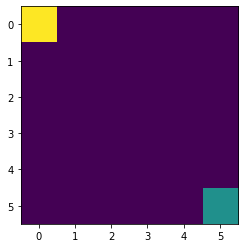

In [4]:
env = GridEnvironement()
env.reset()
env.render()

Reward: 0


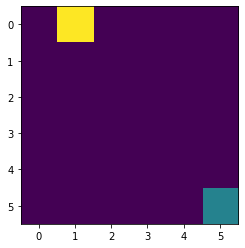

In [5]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 3


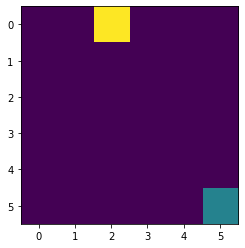

In [6]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


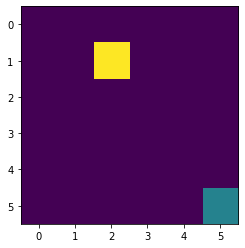

In [7]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -5


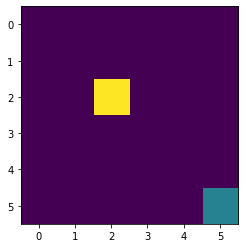

In [8]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


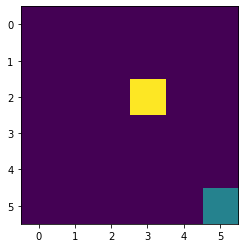

In [9]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -3


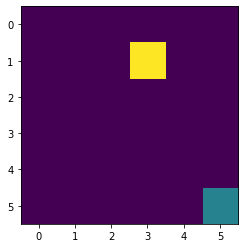

In [10]:
action = 1
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


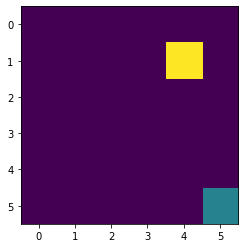

In [11]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


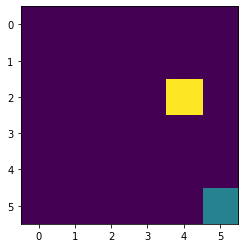

In [12]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


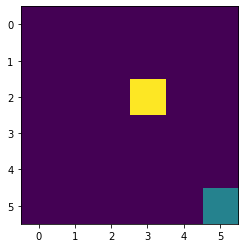

In [13]:
action = 3
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


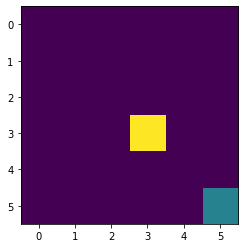

In [14]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


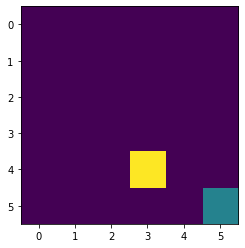

In [15]:
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: -9


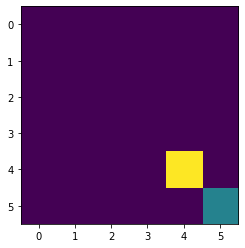

In [16]:
action = 2
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

Reward: 0


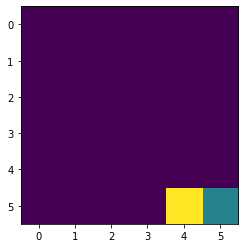

In [17]:
# Reaching goal reward earn you 15 pts.
action = 0
observation, reward, done, info = env.step(action)
print("Reward: {}".format(reward))
env.render()

# Environment Description: 
This environement motivated of social media suggested friends. We can look at the grid box as graph. Every cell is acquaintances or friends who do not have other friends to introduce you to, and some cells are the one who will get you to your future best friend. 
Action we have implemeneted: up, right, down, left. 
There are 36 states which 36 friends. Acquaintances their reward are ZEROS. 
Some connection have from as low as +3 to as high to +10. 



# Conclusions OF ENVIRONEMENT:
Environement is the visualization of Making connection and reaching that friend who will eventually become your best friend. 
Next step to work on: is to train the agent to reach the goal quick and meet best friend with making as low friend as possible along the way. Using SARSA ALGO, AND Q-LEARNING